# **Delhivery-Feature Engineering Case Study**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Update this path to point to your CSV file in Google Drive
path = '/content/drive/MyDrive/Case Studies/delhivery_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Display the first few rows of the DataFrame
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# Finding the dimension of the data
df.shape

(144867, 24)

- Here we have no. of `rows is 144867` and no. of `columns is 24`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# lets check if there is any null values in the data
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


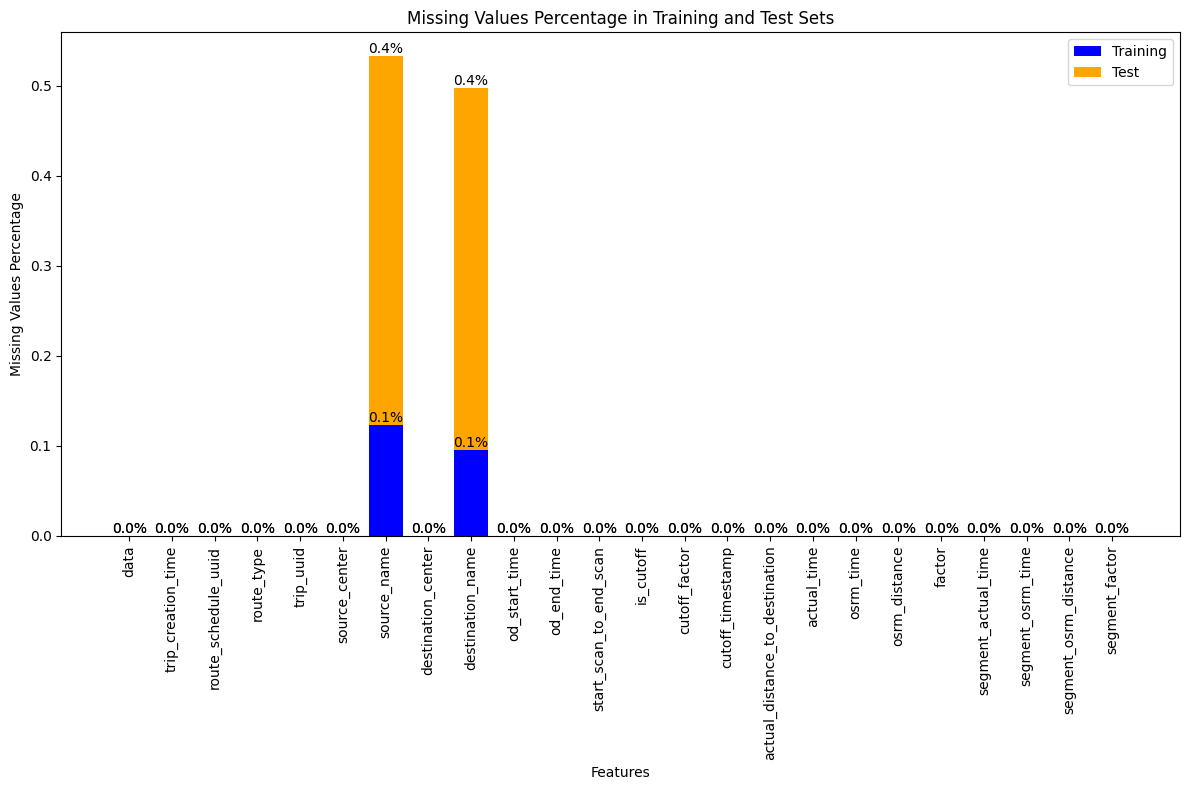

In [ ]:
 # Calculate the percentage of missing values
 missing_percentages = df.isnull().mean() * 100

# Separate features into training and test sets
 training_features = df[df['data'] == 'training']
 test_features = df[df['data'] == 'test']
 # Calculate count of missing values
 training_missing_counts = training_features.isnull().sum()
 test_missing_counts = test_features.isnull().sum()

# Calculate total number of rows in each set
 total_training = len(training_features)
 total_test = len(test_features)

# Calculate missing values percentages for training and test sets
 training_missing_percentages = (training_missing_counts / total_training) * 100
 test_missing_percentages = (test_missing_counts / total_test) * 100

# Create a stacked bar graph
 fig, ax = plt.subplots(figsize=(12, 8))

training_bars = ax.bar(training_missing_percentages.index,
                       training_missing_percentages,
                       label='Training',
                       color='blue')

test_bars = ax.bar(test_missing_percentages.index,
                   test_missing_percentages,
                   bottom=training_missing_percentages,
                   label='Test',
                   color='orange')

# Add data labels
 for bar in training_bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.1f}%', ha='center', va='bottom'
    )

for bar in test_bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + bar.get_y(),
        f'{height:.1f}%', ha='center', va='bottom'
    )

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in Training and Test Sets')
plt.legend()
plt.tight_layout()
plt.show()

- The chart shows that only the **"source_name"** and **"destination_name"** features have missing values, with **0.5%** missing in total. All other features have **0% missing data**, indicating the dataset is mostly complete.

In [ ]:
# Filter rows where both source_name and destination_name are not null
filtered_df = df[~((~df['source_name'].isnull()) & (~df['destination_name'].isnull()))].copy()

# Define a function to categorize the null combinations
def categorize_null(row):
    if pd.isnull(row['source_name']) and pd.isnull(row['destination_name']):
        return 'both_null'
    elif pd.isnull(row['source_name']):
        return 'source_null'
    elif pd.isnull(row['destination_name']):
        return 'destination_null'
    else:
        return 'none'

# Apply the function to create a new column indicating the null combination type
filtered_df['null_combination_type'] = filtered_df.apply(categorize_null, axis=1)

# Group by the null combination type, source_name, and destination_name, and count the occurrences
combination_counts = filtered_df.groupby(['source_name', 'destination_name', 'null_combination_type']).size().reset_index(name='count')

# Print the resulting DataFrame
print(combination_counts)


Empty DataFrame
Columns: [source_name, destination_name, null_combination_type, count]
Index: []


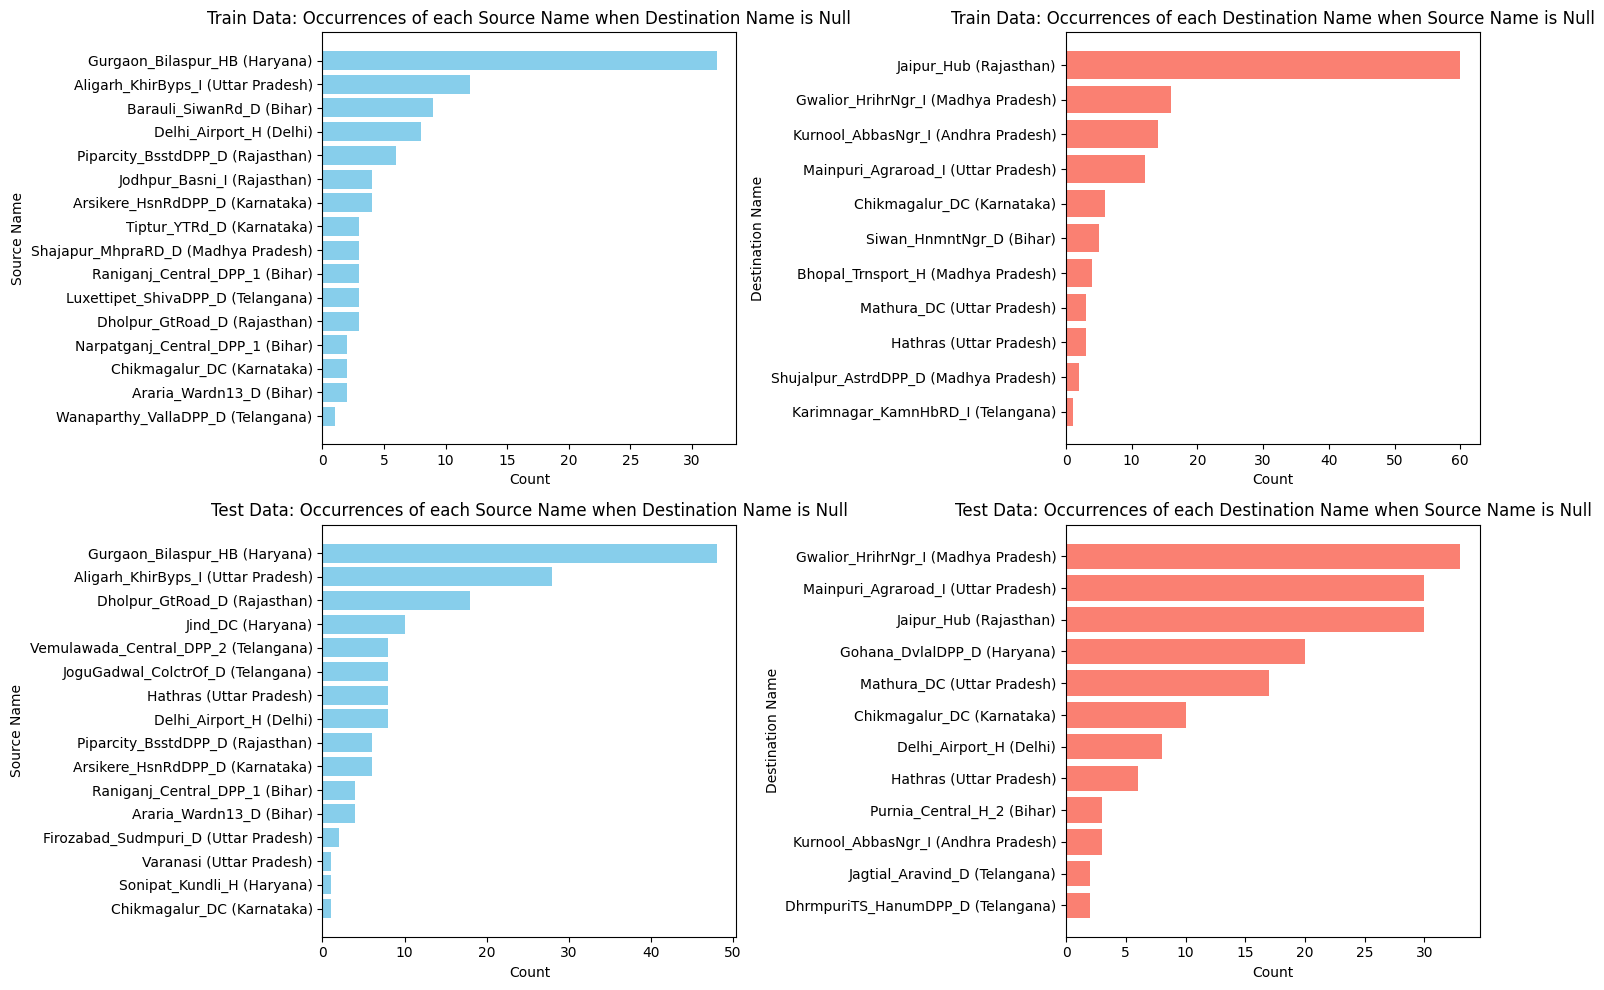

In [ ]:
# Filter rows based on the 'data' column
train_data = filtered_df[filtered_df['data'] == 'training']
test_data = filtered_df[filtered_df['data'] == 'test']

# Count occurrences of each source_name when destination_name is null for train data
destination_null_counts_train = train_data[train_data['null_combination_type'] == 'destination_null']\
                                .groupby('source_name').size().reset_index(name='count')

# Count occurrences of each destination_name when source_name is null for train data
source_null_counts_train = train_data[train_data['null_combination_type'] == 'source_null']\
                            .groupby('destination_name').size().reset_index(name='count')

# Count occurrences of each source_name when destination_name is null for test data
destination_null_counts_test = test_data[test_data['null_combination_type'] == 'destination_null']\
                                .groupby('source_name').size().reset_index(name='count')

# Count occurrences of each destination_name when source_name is null for test data
source_null_counts_test = test_data[test_data['null_combination_type'] == 'source_null']\
                            .groupby('destination_name').size().reset_index(name='count')

# Sort the destination_null_counts by count for train and test data
destination_null_counts_train_sorted = destination_null_counts_train.sort_values(by='count', ascending=True)
destination_null_counts_test_sorted = destination_null_counts_test.sort_values(by='count', ascending=True)

# Sort the source_null_counts by count for train and test data
source_null_counts_train_sorted = source_null_counts_train.sort_values(by='count', ascending=True)
source_null_counts_test_sorted = source_null_counts_test.sort_values(by='count', ascending=True)

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot occurrences of each source_name when destination_name is null for train data
ax1.barh(destination_null_counts_train_sorted['source_name'], destination_null_counts_train_sorted['count'],
         color='skyblue')
ax1.set_xlabel('Count')
ax1.set_ylabel('Source Name')
ax1.set_title('Train Data: Occurrences of each Source Name when Destination Name is Null')

# Plot occurrences of each destination_name when source_name is null for train data
ax2.barh(source_null_counts_train_sorted['destination_name'], source_null_counts_train_sorted['count'],
         color='salmon')
ax2.set_xlabel('Count')
ax2.set_ylabel('Destination Name')
ax2.set_title('Train Data: Occurrences of each Destination Name when Source Name is Null')

# Plot occurrences of each source_name when destination_name is null for test data
ax3.barh(destination_null_counts_test_sorted['source_name'], destination_null_counts_test_sorted['count'],
         color='skyblue')
ax3.set_xlabel('Count')
ax3.set_ylabel('Source Name')
ax3.set_title('Test Data: Occurrences of each Source Name when Destination Name is Null')

# Plot occurrences of each destination_name when source_name is null for test data
ax4.barh(source_null_counts_test_sorted['destination_name'], source_null_counts_test_sorted['count'],
         color='salmon')
ax4.set_xlabel('Count')
ax4.set_ylabel('Destination Name')
ax4.set_title('Test Data: Occurrences of each Destination Name when Source Name is Null')

# Adjust layout
plt.tight_layout()
plt.show()


The charts show that in both the training and test data:

  - `Gurgaon_Bilaspur_HB (Haryana) and Aligarh_KhirByps_I (Uttar Pradesh)` are the most common source names with missing destination names.

  - `Jaipur_Hub (Rajasthan) and Gwalior_HrihrNgr_I (Madhya Pradesh)` are the most frequent destination names with missing source names.

### **Extracting city, state from source name**

In [ ]:
# Extracting source city and source state
df['source_city'] = df['source_name'].str.extract(r'^(.*?)_')  # Extract city before the first underscore
df['source_state'] = df['source_name'].str.extract(r'\((.*?)\)')  # Extract state within parentheses

# Extracting destination city and destination state
df['destination_city'] = df['destination_name'].str.extract(r'^(.*?)_')  # Extract city before the first underscore
df['destination_state'] = df['destination_name'].str.extract(r'\((.*?)\)')  # Extract state within parentheses

### Filling the missing values with unknown in the place of null values.

In [ ]:
# Fill missing values in the newly created columns with 'Unknown'
columns_to_fill = ['source_city', 'source_state', 'destination_city', 'destination_state']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat


In [ ]:
df['source_state'].unique()
df['source_state'] = df['source_state'].str.upper()
df['destination_state'] =df['destination_state'].str.upper()
df['destination_state']

,destination_state
0,GUJARAT
1,GUJARAT
2,GUJARAT
3,GUJARAT
4,GUJARAT
...,...
144862,HARYANA
144863,HARYANA
144864,HARYANA
144865,HARYANA


# Checking for outliers

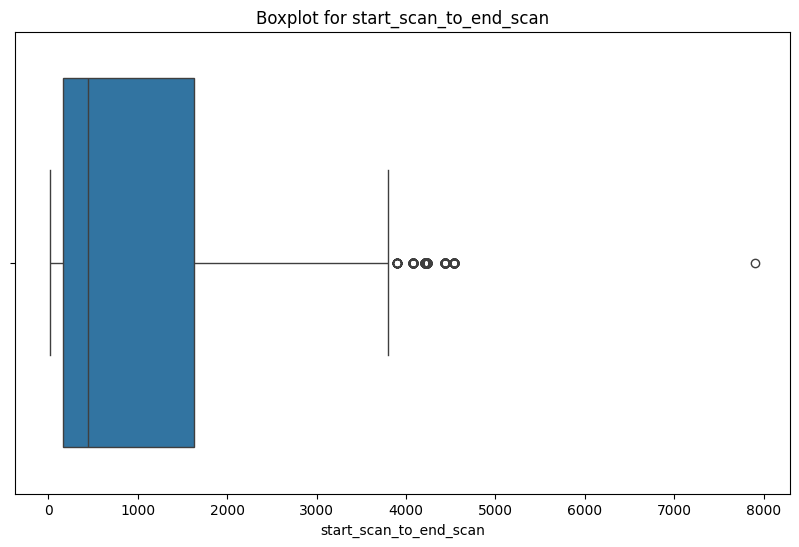

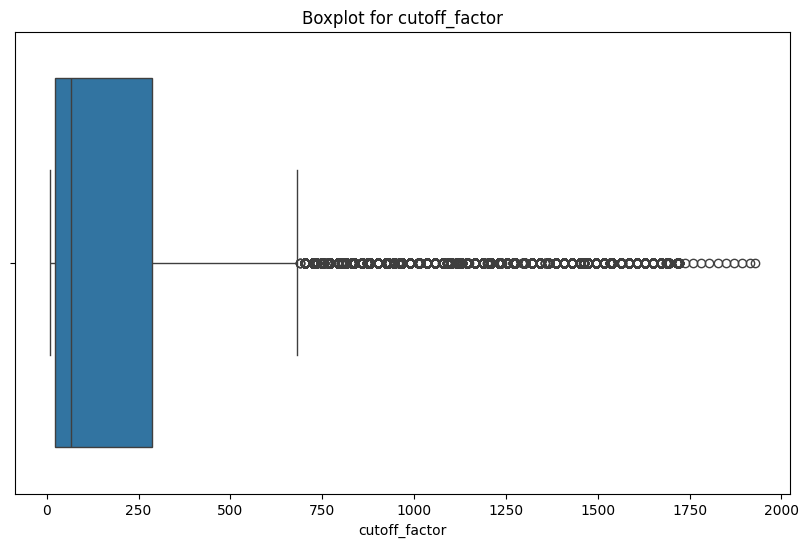

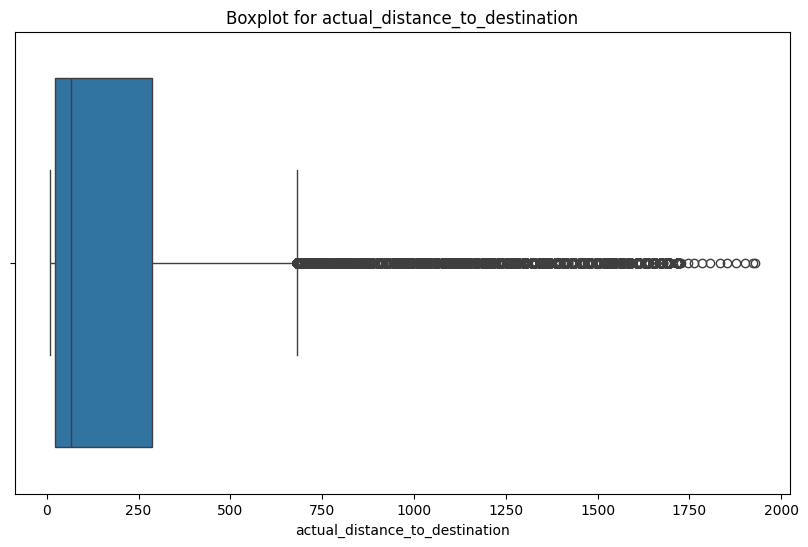

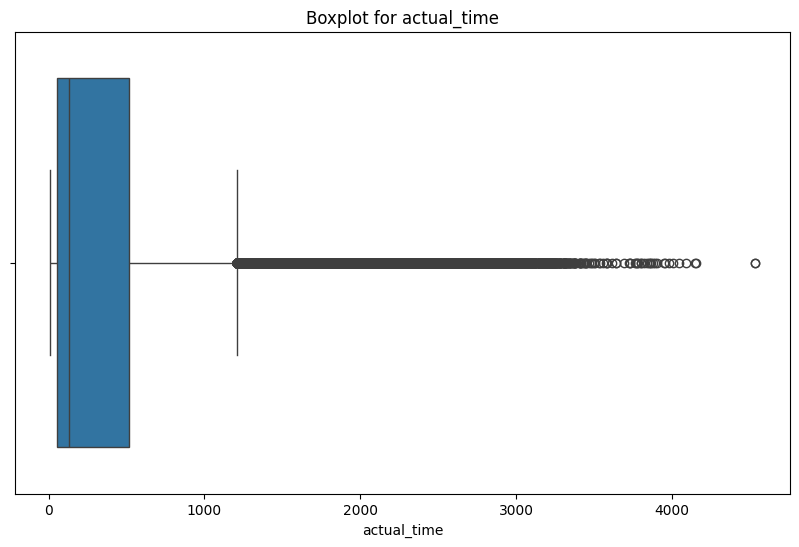

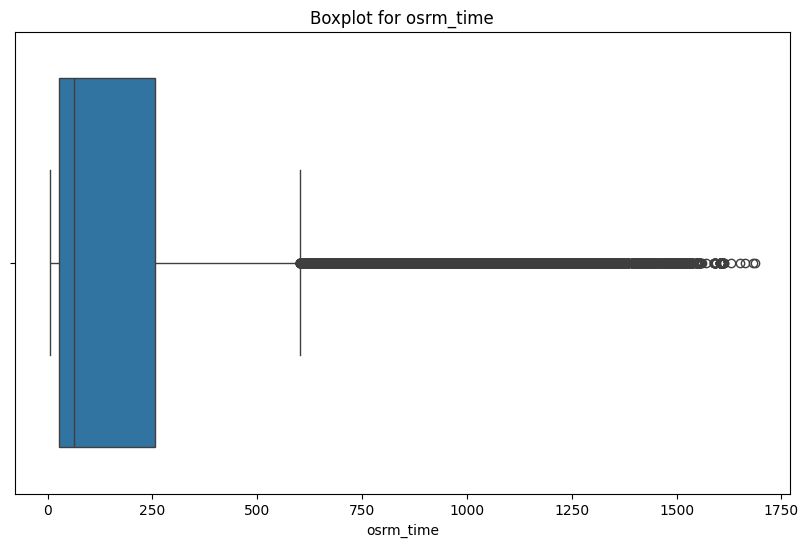

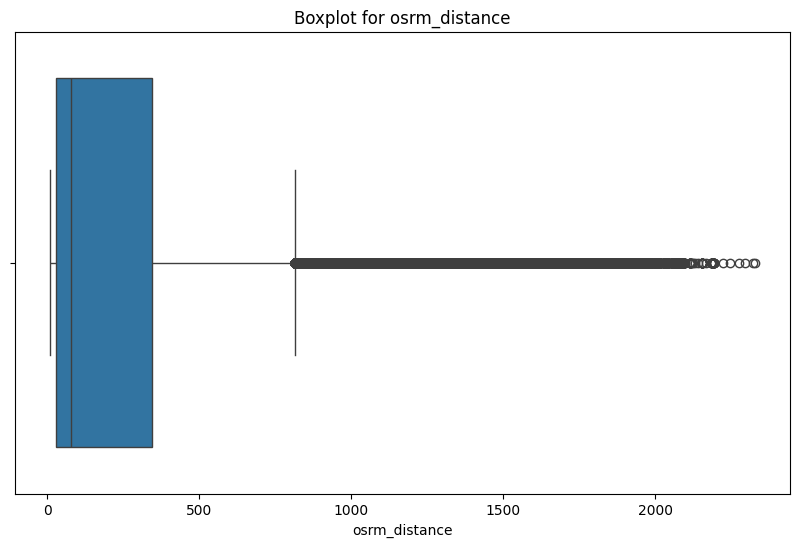

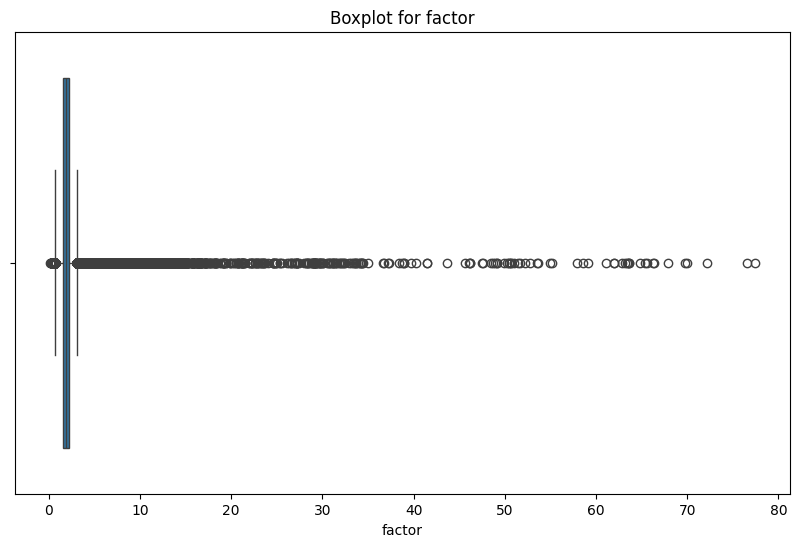

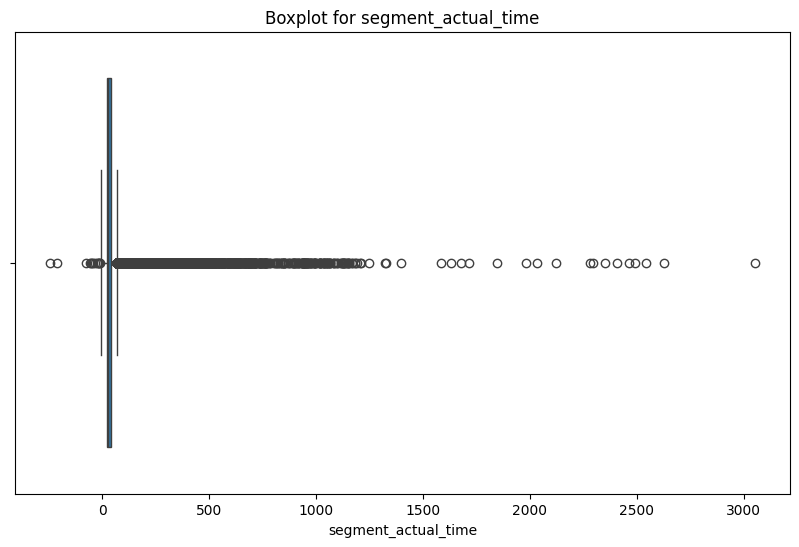

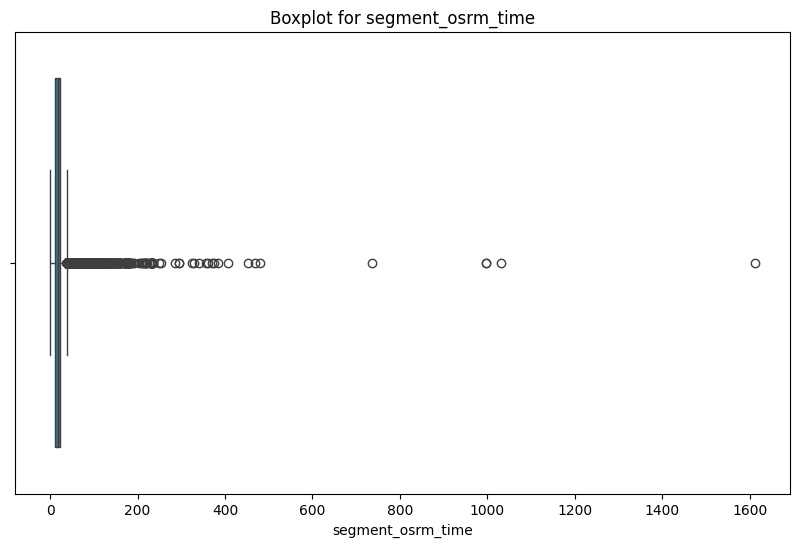

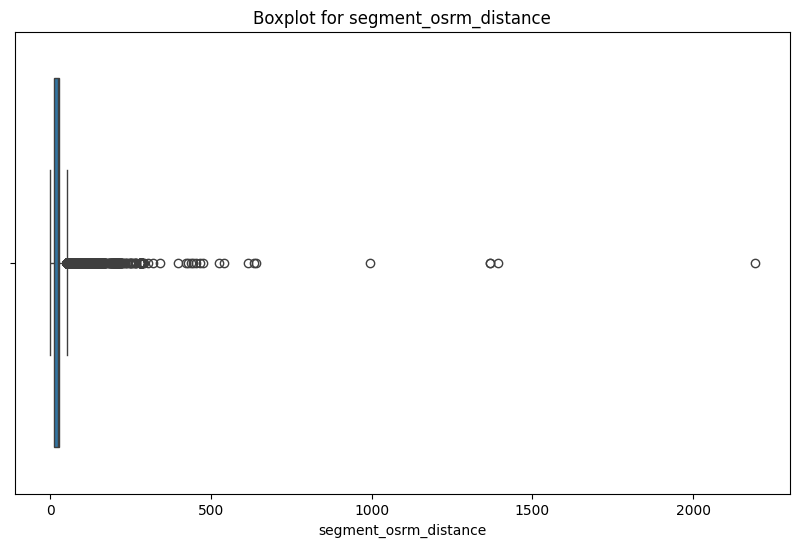

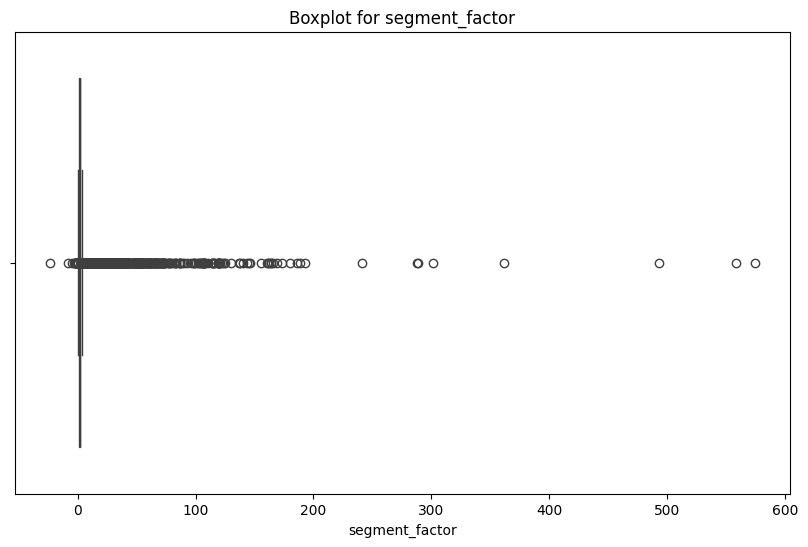

In [ ]:
# 1. Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 2. Plotting boxplots for all numerical columns to check for outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
# 1. Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 2. Define a function to filter outliers using the IQR method
def filter_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data within the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 3. Apply the IQR method to each numerical column and filter outliers
for col in numerical_columns:
    df_filtered = filter_outliers_iqr(df, col)
    df = df_filtered  # Update the dataframe with filtered data

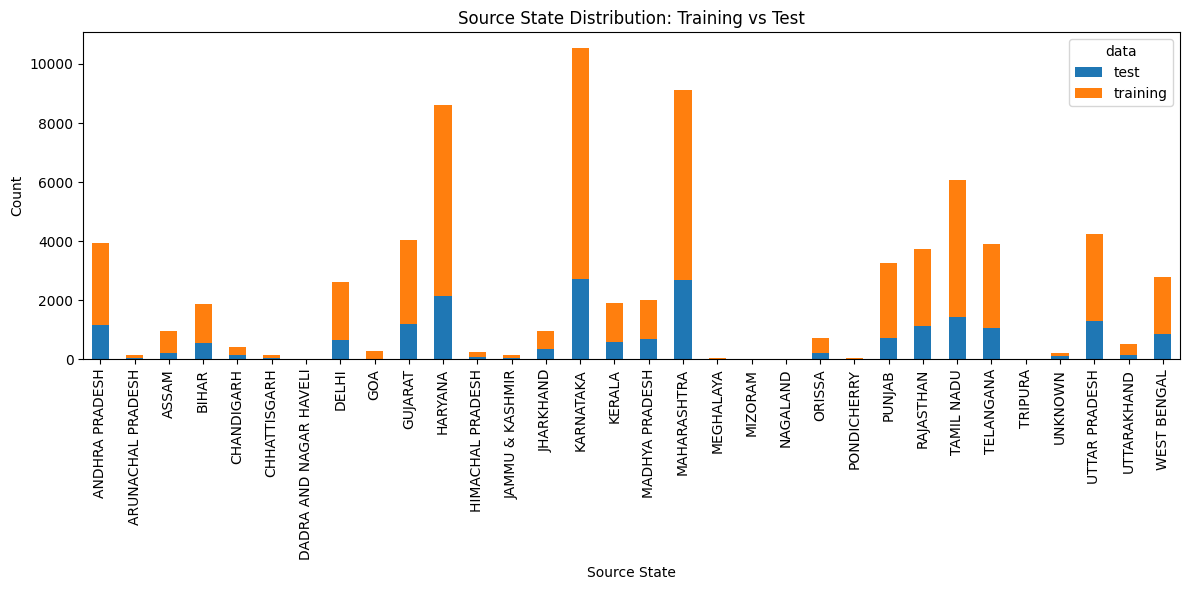

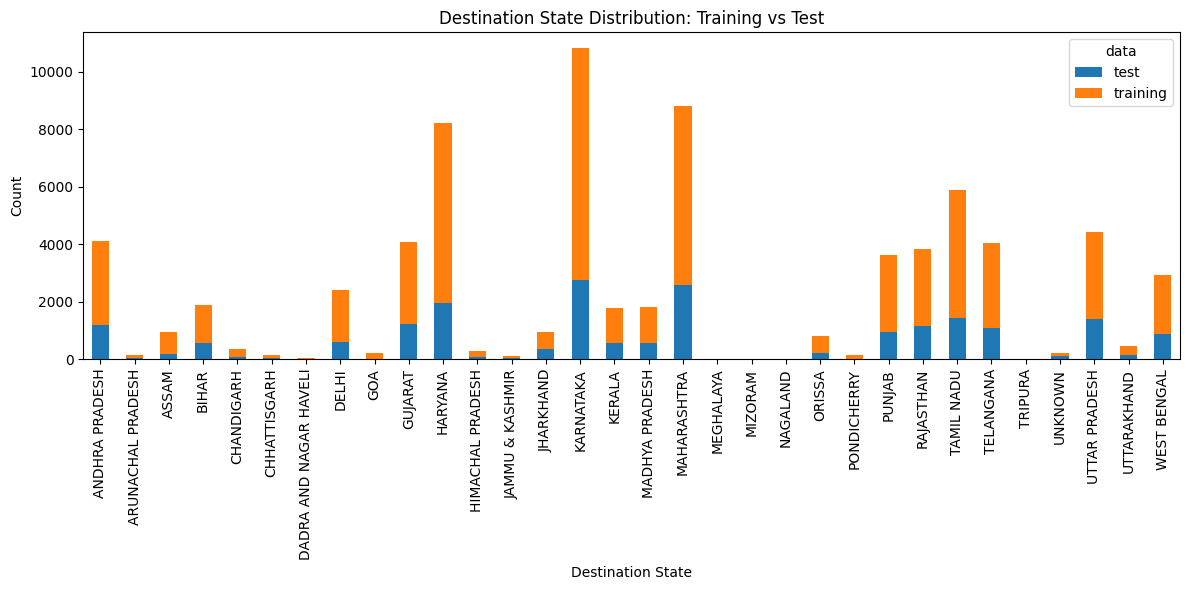

In [ ]:
# Aggregate data by source state and count occurrences for training and test datasets
state_counts_source = df.groupby(['source_state', 'data']).size().unstack(fill_value=0)
state_counts_source.reset_index(inplace=True)

# Plot bar chart for Source State Distribution (Training & Test)
fig, ax = plt.subplots(figsize=(12, 6))
state_counts_source.plot(kind='bar', x='source_state', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Source State Distribution: Training vs Test')
ax.set_xlabel('Source State')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Aggregate data by destination state and count occurrences for training and test datasets
state_counts_destination = df.groupby(['destination_state', 'data']).size().unstack(fill_value=0)
state_counts_destination.reset_index(inplace=True)

# Plot bar chart for Destination State Distribution (Training & Test)
fig, ax = plt.subplots(figsize=(12, 6))
state_counts_destination.plot(kind='bar', x='destination_state', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Destination State Distribution: Training vs Test')
ax.set_xlabel('Destination State')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

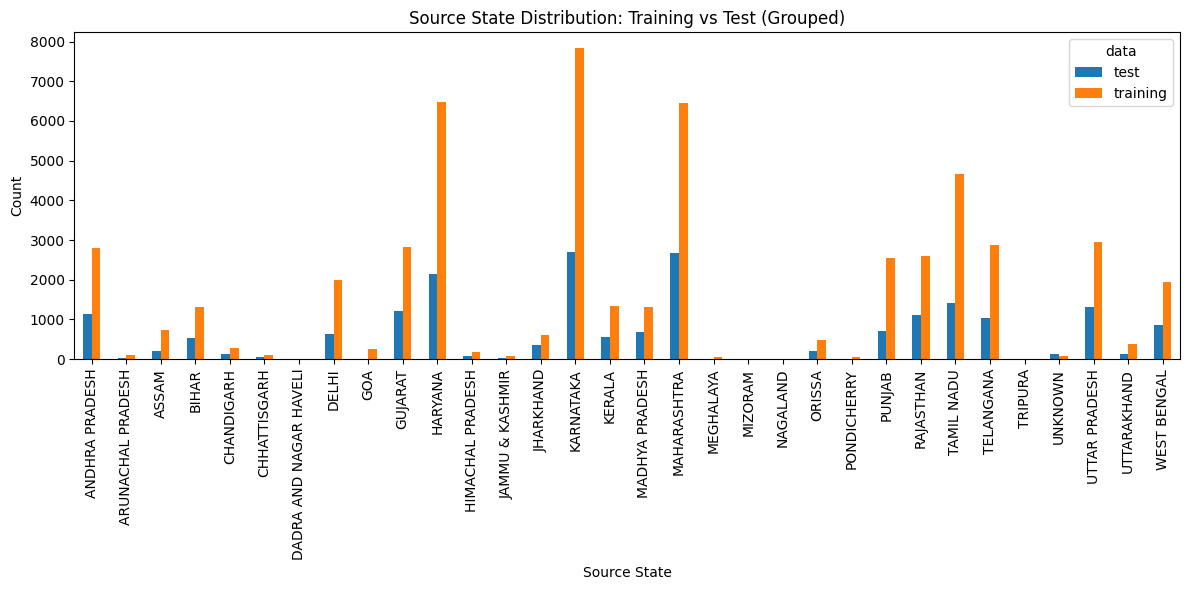

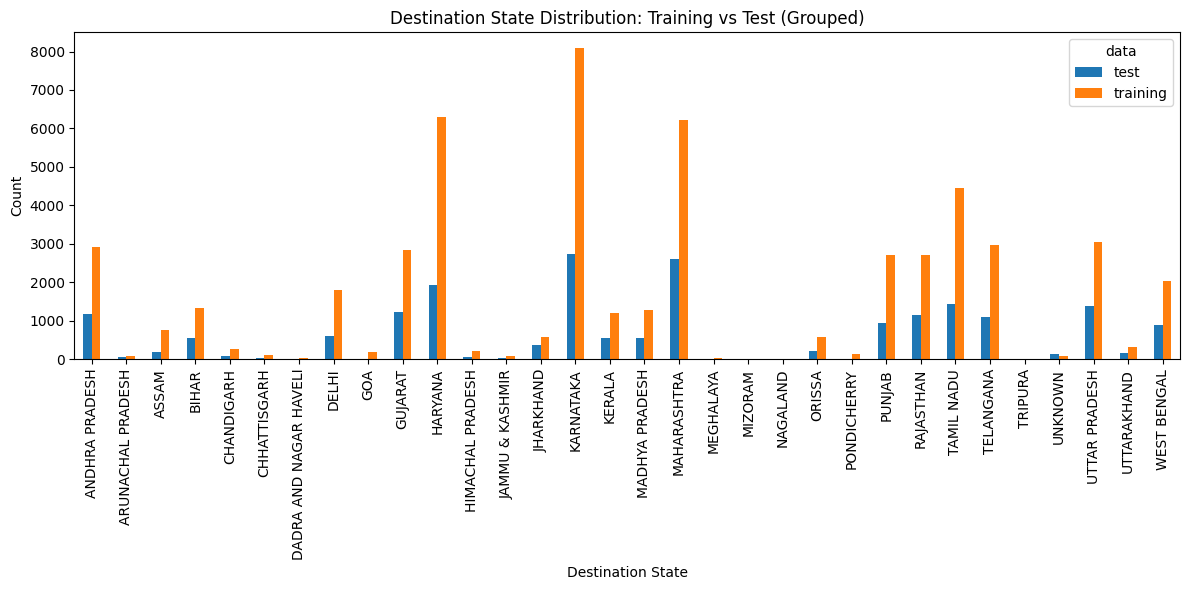

In [ ]:
# Plot grouped bar chart for Source State Distribution (Training & Test)
fig, ax = plt.subplots(figsize=(12, 6))
state_counts_source.plot(kind='bar', x='source_state', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Source State Distribution: Training vs Test (Grouped)')
ax.set_xlabel('Source State')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot grouped bar chart for Destination State Distribution (Training & Test)
fig, ax = plt.subplots(figsize=(12, 6))
state_counts_destination.plot(kind='bar', x='destination_state', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Destination State Distribution: Training vs Test (Grouped)')
ax.set_xlabel('Destination State')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Pattern between source and Destination state are same
 - Pattern changes between training and test with Test distribution have more intensity with respect to **southern region** of India.
 - Primary regions are **NCR, Mumbai** and **Karnataka** probably due to their concentration of corporates.

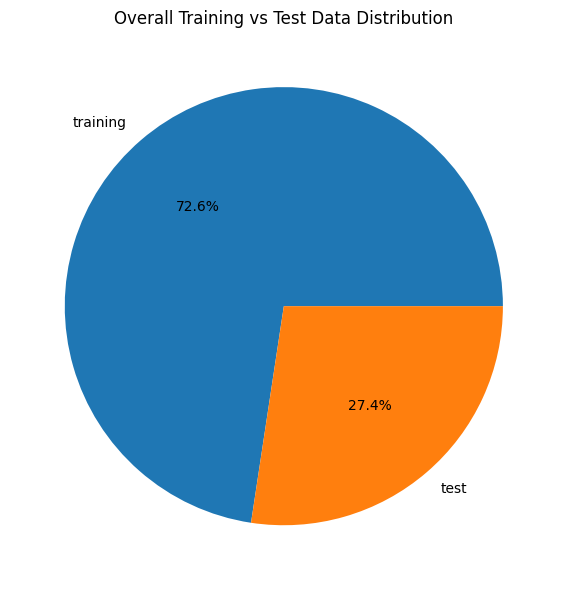

In [ ]:
# Calculate proportions of training and test data
data_proportions = df['data'].value_counts(normalize=True)

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data_proportions, labels=data_proportions.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
ax.set_title('Overall Training vs Test Data Distribution')
plt.tight_layout()
plt.show()


### **Lets us create a new feature which will track difference in minutes between trip start time and end time**

In [ ]:
# Convert 'od_end_time' and 'od_start_time' columns to datetime format
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])

In [ ]:
# Calculating the difference in minutes
df['Trip_difference_in_minutes'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60
df['Trip_difference_in_minutes'].head()

,Trip_difference_in_minutes
0,86.213637
1,86.213637
2,86.213637
3,86.213637
4,86.213637


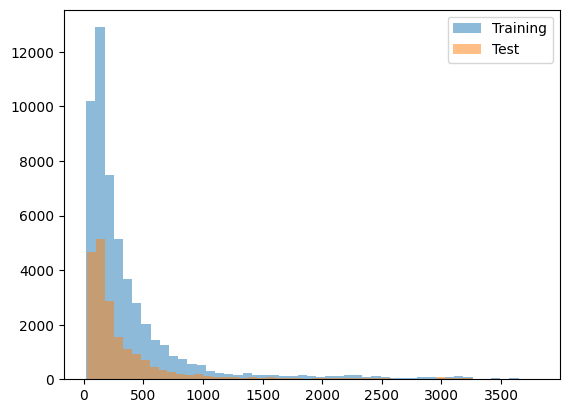

In [ ]:
import random
import numpy

training = df[df['data']=='training']['Trip_difference_in_minutes']
test = df[df['data']=='test']['Trip_difference_in_minutes']
bin1 = numpy.linspace(training.min(),training.max(), 50)
bin2 = numpy.linspace(test.min(),test.max(), 50)
pyplot.hist(training, bin1, alpha=0.5, label='Training')
pyplot.hist(test, bin2, alpha=0.5, label='Test')
pyplot.legend(loc='upper right')
pyplot.show()

- The graph shows heavily right-skewed distributions for both training and test data, with the highest frequencies near zero and rapidly decreasing as values increase.
- The training data (blue) consistently has higher frequencies than the test data (orange) across most of the range, suggesting a larger training dataset compared to the test set.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53319.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20116.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for training data: Statistic: 0.598079927251195 p-value: 5.942189610444126e-137
Shapiro-Wilk test for test data: Statistic: 0.5621741666346434 p-value: 7.389817989554986e-113


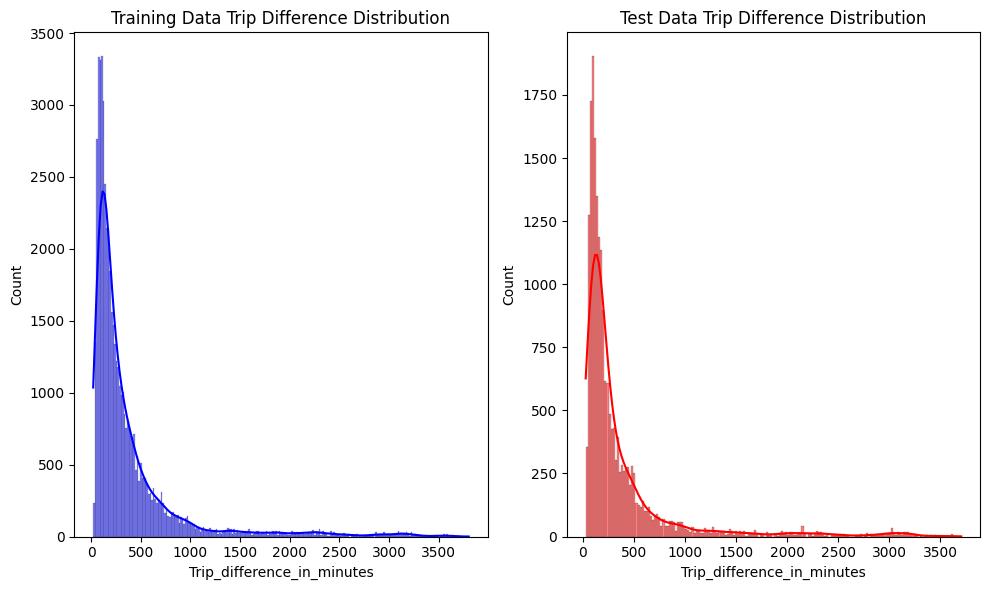

In [ ]:
from scipy.stats import shapiro

training_data = df[df['data'] == 'training']
test_data = df[df['data'] == 'test']

# Shapiro-Wilk test for normality
train_sw_stat, train_sw_p = shapiro(training_data['Trip_difference_in_minutes'])
test_sw_stat, test_sw_p = shapiro(test_data['Trip_difference_in_minutes'])
print("Shapiro-Wilk test for training data:", "Statistic:", train_sw_stat, "p-value:", train_sw_p)
print("Shapiro-Wilk test for test data:", "Statistic:", test_sw_stat, "p-value:", test_sw_p)

# Visualize the distributions
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(training_data['Trip_difference_in_minutes'], kde=True, color='blue', label='Training')
plt.title('Training Data Trip Difference Distribution')
plt.subplot(1, 2, 2)
sns.histplot(test_data['Trip_difference_in_minutes'], kde=True, color='red', label='Test')
plt.title('Test Data Trip Difference Distribution')
plt.tight_layout()
plt.show()

- Both training and test data show similar right-skewed distributions of trip differences, with the highest frequency of trips having small time differences (close to 0 minutes).

- The training data set (blue) has a higher overall count and peak compared to the test data set (red), but both follow the same general distribution pattern across the range of trip differences up to 3500 minutes.

### we are going to use kruskal test

In [ ]:
from scipy.stats import kruskal
# Assuming df is already defined and contains the necessary data
# Extract training and test data

training_data = df[df['data'] == 'training']
test_data = df[df['data'] == 'test']

# Extract the Trip_difference_in_minutes columns
training_trip_diff = training_data['Trip_difference_in_minutes']
test_trip_diff = test_data['Trip_difference_in_minutes']

# Perform Kruskal-Wallis H-test
stat, p_value = kruskal(training_trip_diff, test_trip_diff)

print("Training time difference:",training_trip_diff.median())
print("Testing time difference:",test_trip_diff.median())
print(f'Kruskal-Wallis H-test statistic: {stat}')
print(f'p-value: {p_value}')

Training time difference: 206.41323346666667
Testing time difference: 182.34887429999998
Kruskal-Wallis H-test statistic: 117.79651946637281
p-value: 1.921201736139553e-27


In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


# Let us compare Actual time with OSRM time

In [ ]:
from scipy.stats import shapiro, ttest_ind, kruskal, levene

# Assuming df is already defined and contains the necessary data
compare_actual_vs_osrm = df[['trip_uuid', 'segment_actual_time', 'segment_osrm_time']]

# Step 1: Aggregate the data by trip_uuid
aggregated_data = compare_actual_vs_osrm.groupby('trip_uuid').agg({
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum'
}).reset_index()

# Extract the aggregated columns
actual_times = aggregated_data['segment_actual_time']
osrm_times = aggregated_data['segment_osrm_time']

# Step 2: Check for normality using the Shapiro-Wilk test
stat_actual, p_actual = shapiro(actual_times)
stat_osrm, p_osrm = shapiro(osrm_times)
print(f'Shapiro-Wilk test for actual times: statistic={stat_actual}, p-value={p_actual}')
print(f'Shapiro-Wilk test for OSRM times: statistic={stat_osrm}, p-value={p_osrm}')

# Step 3: Perform hypothesis testing
if p_actual > 0.05 and p_osrm > 0.05:
    # Check for equal variance using Levene's test
    stat_levene, p_levene = levene(actual_times, osrm_times)
    print(f'Levene’s test for equal variances: statistic={stat_levene}, p-value={p_levene}')

    if p_levene > 0.05:
        # Perform t-test with equal variances
        stat, p_value = ttest_ind(actual_times, osrm_times, equal_var=True)
        test_name = "t-test with equal variances"
    else:
        # Perform Welch's t-test (unequal variances)
        stat, p_value = ttest_ind(actual_times, osrm_times, equal_var=False)
        test_name = "Welch's t-test (unequal variances)"
else:
    # At least one distribution is not normal, use Kruskal-Wallis test
    stat, p_value = kruskal(actual_times, osrm_times)
    test_name = "Kruskal-Wallis test"

print(f'{test_name} statistic: {stat}')
print(f'{test_name} p-value: {p_value}')


Shapiro-Wilk test for actual times: statistic=0.839733021154724, p-value=2.456009650771559e-79
Shapiro-Wilk test for OSRM times: statistic=0.8510588872098319, p-value=1.0097137712843605e-77
Kruskal-Wallis test statistic: 2027.5501775872583
Kruskal-Wallis test p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14008.
  res = hypotest_fun_out(*samples, **kwds)


- The Shapiro-Wilk tests show that both actual and OSRM times deviate significantly from a normal distribution (p-values < 1e-77). The Kruskal-Wallis test indicates a highly significant difference between the two distributions (p = 0.0). These findings suggest using non-parametric methods for analysis.

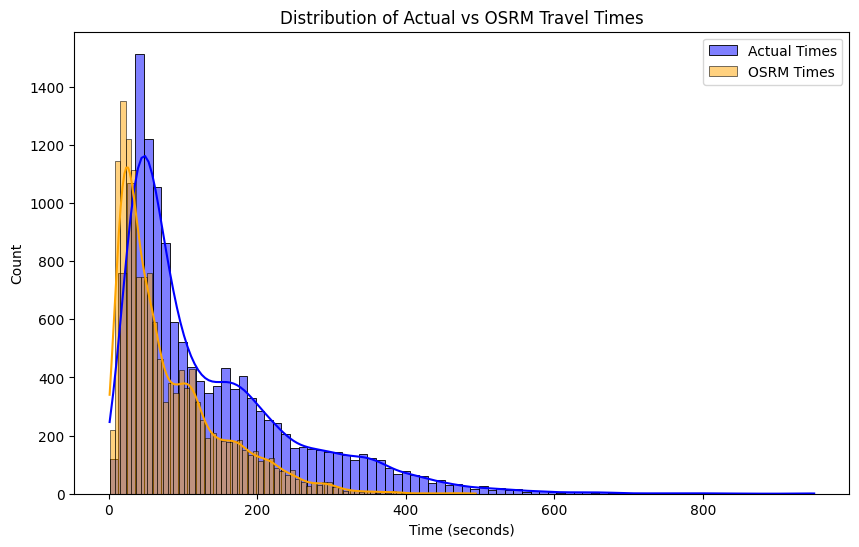

In [ ]:
# Step 4: Visualize the distributions
plt.figure(figsize=(10,6))
sns.histplot(actual_times, label='Actual Times', color='blue', kde=True)
sns.histplot(osrm_times, label='OSRM Times', color='orange', kde=True)
plt.title('Distribution of Actual vs OSRM Travel Times')
plt.xlabel('Time (seconds)')
plt.legend()
plt.show()

- The distributions of actual and OSRM travel times are both highly right-skewed, with most trips concentrated under 200 seconds, and the OSRM times generally shorter than the actual times.

- There are noticeable discrepancies between the two distributions, particularly in the lower range (0-200 seconds), where OSRM times tend to peak earlier than actual times, indicating systematic differences in predicted versus real travel times.

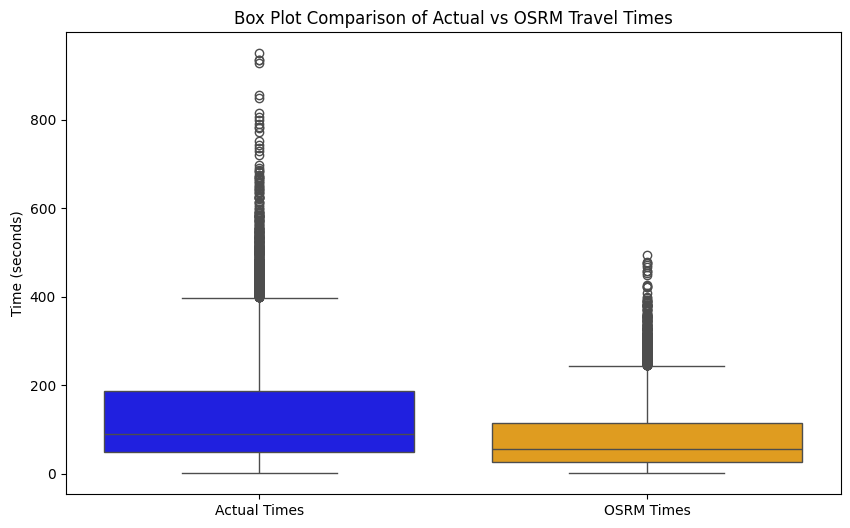

In [ ]:
# Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=[actual_times, osrm_times], palette=['blue', 'orange'])
plt.xticks([0, 1], ['Actual Times', 'OSRM Times'])
plt.title('Box Plot Comparison of Actual vs OSRM Travel Times')
plt.ylabel('Time (seconds)')
plt.show()

- We could see there is significant difference between actual segment time and OSRM time so it may not be ideal to use OSRM time for explaining actual time.

<Axes: xlabel='actual_time', ylabel='osrm_time'>

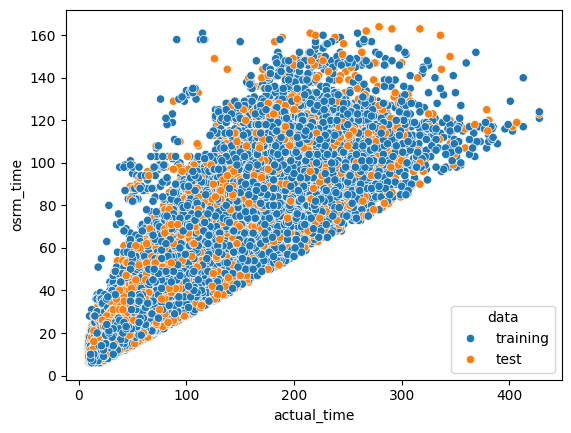

In [ ]:
sns.scatterplot(data=df,x='actual_time',y='osrm_time',hue='data')

- The scatter plot shows a strong positive correlation between actual travel time and OSRM-predicted time for both training and test data. However, OSRM times tend to underestimate actual times for higher values, with more variability as actual times increase.

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,Trip_difference_in_minutes
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,Anand,GUJARAT,Khambhat,GUJARAT,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,Anand,GUJARAT,Khambhat,GUJARAT,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,Anand,GUJARAT,Khambhat,GUJARAT,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,Anand,GUJARAT,Khambhat,GUJARAT,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,Anand,GUJARAT,Khambhat,GUJARAT,86.213637


<ipython-input-34-9b8dd4af349c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=aggregated_df, x="actual_distance_to_destination", label="Actual Distance", shade=True)
<ipython-input-34-9b8dd4af349c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=aggregated_df, x="osrm_distance", label="OSRM Distance", shade=True)


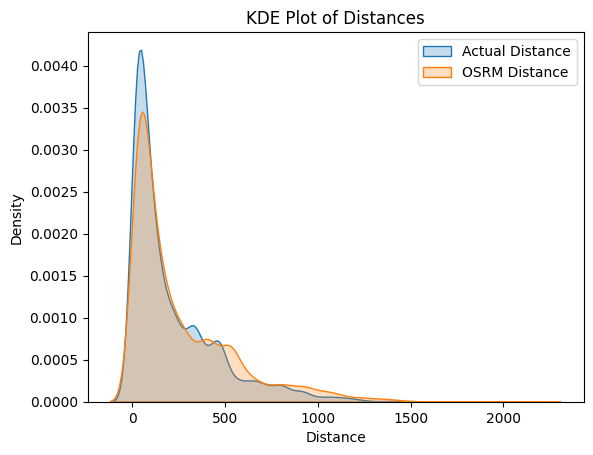

In [ ]:
compare_osmdistance_actualdistance = df[['trip_uuid','actual_distance_to_destination','osrm_distance']]

# Aggregate data by trip_uuid
aggregated_df = compare_osmdistance_actualdistance.groupby('trip_uuid').sum().reset_index()

# KDE plot
sns.kdeplot(data=aggregated_df, x="actual_distance_to_destination", label="Actual Distance", shade=True)
sns.kdeplot(data=aggregated_df, x="osrm_distance", label="OSRM Distance", shade=True)

# Adding labels and title
plt.xlabel('Distance')
plt.ylabel('Density')
plt.title('KDE Plot of Distances')
plt.legend()
plt.show()

- The OSRM distance estimates closely match the actual distances, as shown by the similar distribution curves.

- There are minor discrepancies: OSRM slightly overestimates very short distances and underestimates some mid-range distances around 500 units.

###  **They dont look multi model but normal lets also check that using Q-Q plot.**

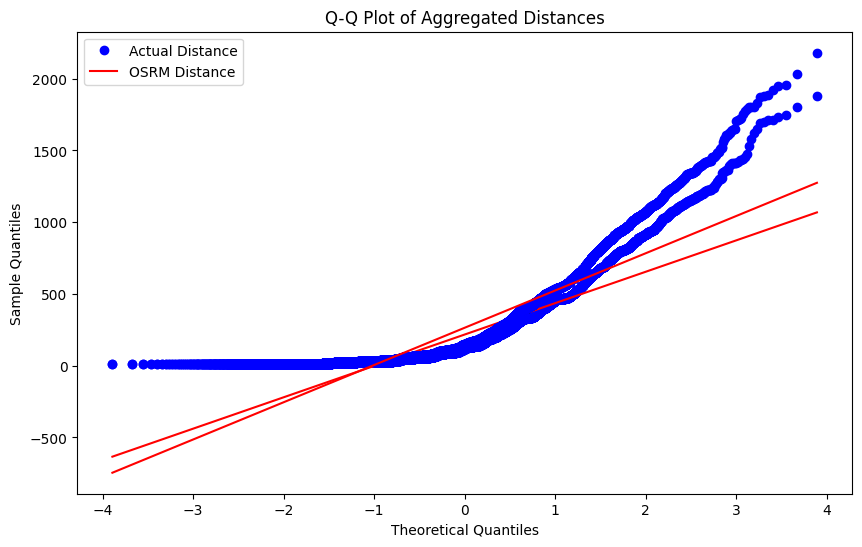

In [ ]:
# Q-Q plot of actual_distance_to_destination against osrm_distance
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(aggregated_df["actual_distance_to_destination"], dist="norm", plot=plt)
stats.probplot(aggregated_df["osrm_distance"], dist="norm", plot=plt)

# Adding labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Aggregated Distances')
plt.legend(['Actual Distance', 'OSRM Distance'])
plt.show()

- It seems they are not normal from Q-Q plot let us use KW test to
 compare their median.

In [ ]:
# Extract the distances
actual_distances = aggregated_df['actual_distance_to_destination']
osrm_distances = aggregated_df['osrm_distance']

# Perform the Kruskal-Wallis test
kw_result = kruskal(actual_distances, osrm_distances)
kw_result

KruskalResult(statistic=231.566362920795, pvalue=2.714875281716894e-52)

-  There is definitely a a big difference in actual distance vs osrm distance. so, we can stick to actual_distance_to_destination

<Axes: xlabel='factor', ylabel='segment_factor'>

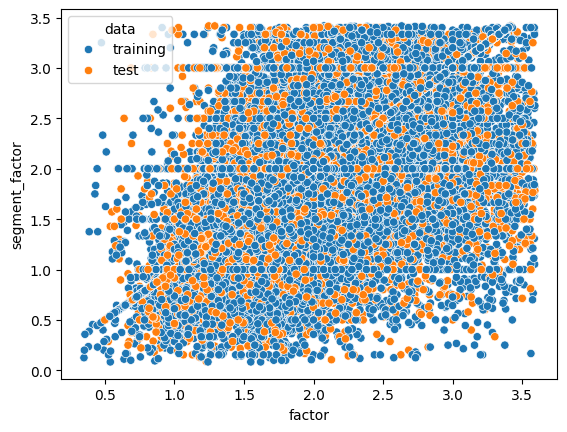

In [ ]:
sns.scatterplot(data=df,x='factor',y='segment_factor',hue='data')

- We could see some outliers between segment_factor and factor .
 Although this is unknown field for us.
- The scatter plot displays a dense, roughly circular distribution, with values ranging from about 0 to 3.5 on both axes, suggesting a `complex relationship` between the variables that `doesn't follow a simple linear pattern.`

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [ ]:
df['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35508.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for Carting: ShapiroResult(statistic=0.7134366988046708, pvalue=1.9576363061714446e-116)


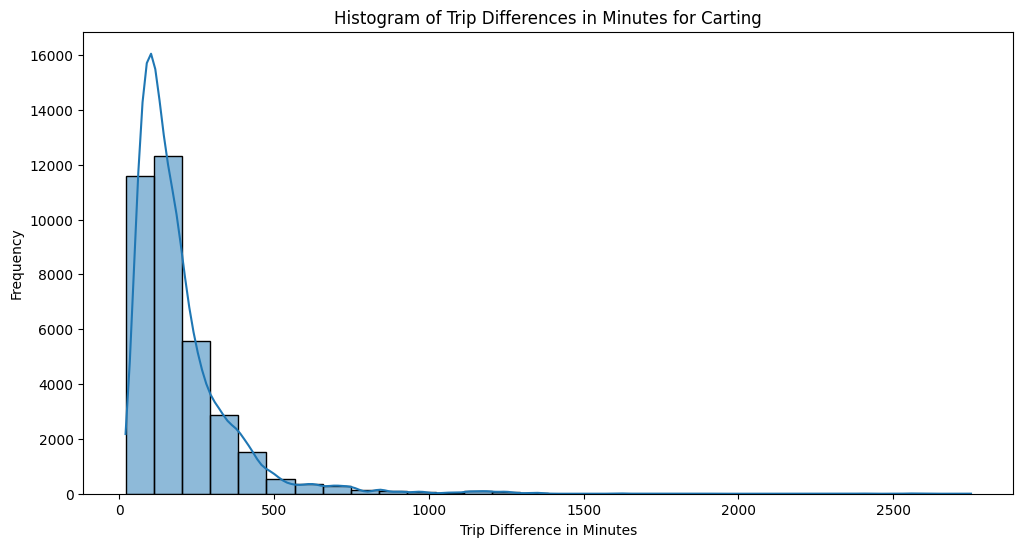

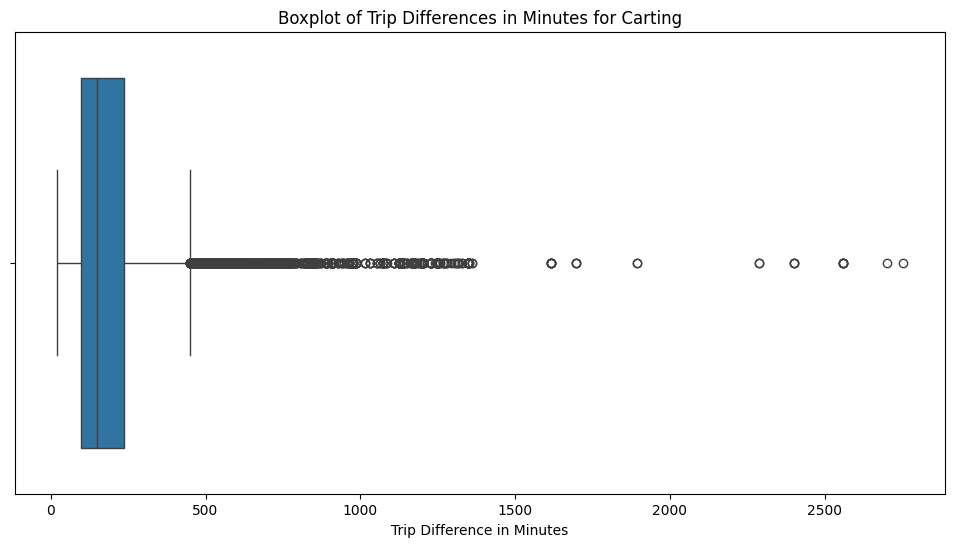

The data for Carting is not normally distributed. Performing Kruskal-Wallis test...
Kruskal-Wallis test result: KruskalResult(statistic=9808.157330372213, pvalue=0.0)
Shapiro-Wilk test for FTL: ShapiroResult(statistic=0.6960593764924505, pvalue=8.817694433308312e-120)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37927.
  res = hypotest_fun_out(*samples, **kwds)


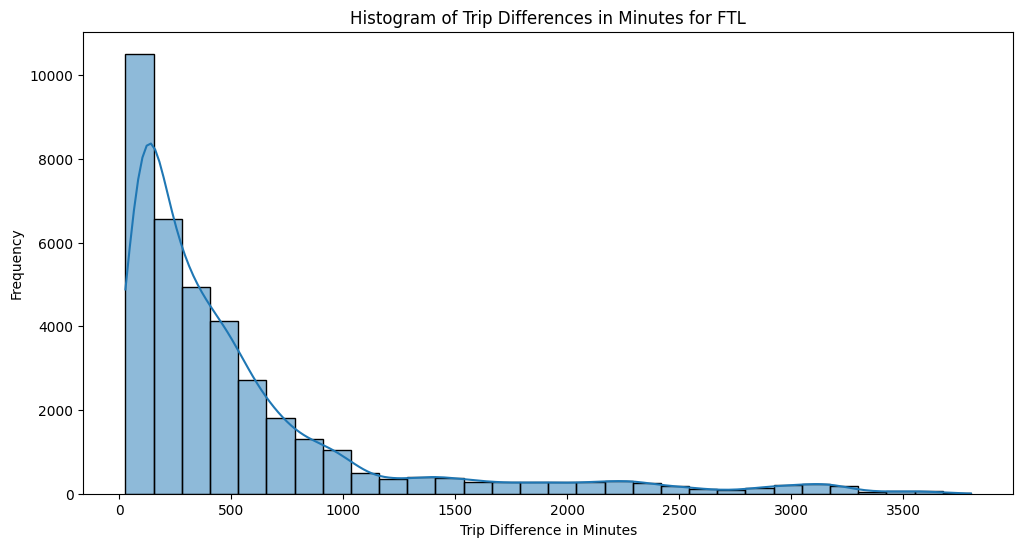

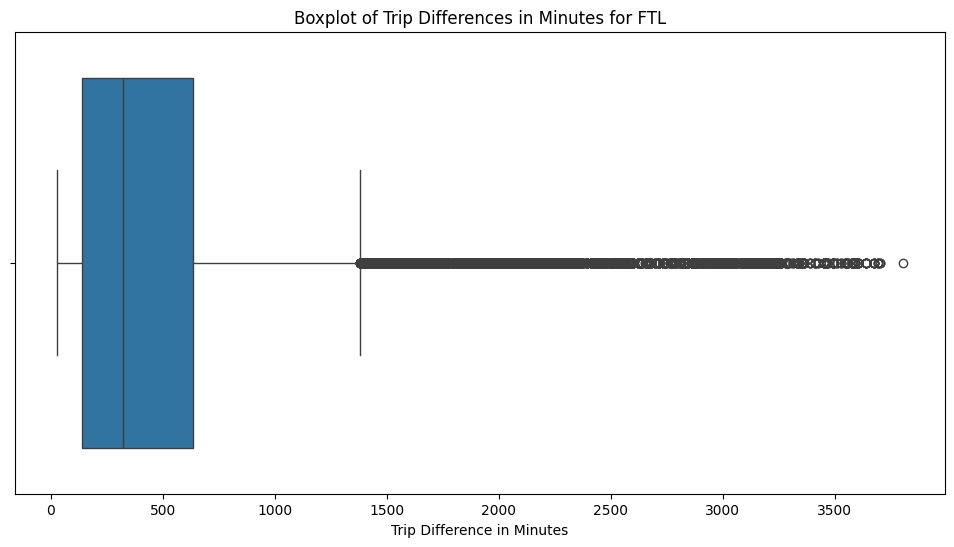

The data for FTL is not normally distributed. Performing Kruskal-Wallis test...
Kruskal-Wallis test result: KruskalResult(statistic=9808.157330372213, pvalue=0.0)


In [ ]:
# Function to check normality and perform appropriate tests
def check_and_test_route_type(df):
  route_types = df['route_type'].unique()
  for route_type in route_types:
      route_data = df[df['route_type'] == route_type]['Trip_difference_in_minutes']

      # Perform normality test (Shapiro-Wilk test)
      shapiro_test = stats.shapiro(route_data)
      print(f"Shapiro-Wilk test for {route_type}: {shapiro_test}")

      # Visualize the data distribution
      plt.figure(figsize=(12, 6))
      sns.histplot(route_data, bins=30, kde=True)
      plt.title(f'Histogram of Trip Differences in Minutes for {route_type}')
      plt.xlabel('Trip Difference in Minutes')
      plt.ylabel('Frequency')
      plt.show()

      plt.figure(figsize=(12, 6))
      sns.boxplot(x=route_data)
      plt.title(f'Boxplot of Trip Differences in Minutes for {route_type}')
      plt.xlabel('Trip Difference in Minutes')
      plt.show()

      if shapiro_test.pvalue < 0.05:
          print(f"The data for {route_type} is not normally distributed. Performing Kruskal-Wallis test...")
          # Normally, Kruskal-Wallis test is used for comparing multiple groups. Since we have only one route_type in
          # we should not perform Kruskal-Wallis test here. But if there are multiple route_types, you can perform it
          # Perform Kruskal-Wallis test
          kw_test = stats.kruskal(*[df[df['route_type'] == rt]['Trip_difference_in_minutes'] for rt in route_types])
          print(f"Kruskal-Wallis test result: {kw_test}")
      else:
          print(f"The data for {route_type} is normally distributed. Performing t-test...")
          # Perform t-test
          # t_test = stats.ttest_1samp(route_data, popmean=some_value)
          # print(f"T-test result: {t_test}")

# Call the function
check_and_test_route_type(df)

- We could see significant difference between them with FTL use generally for Inter city travel . We could just represent if its Ftl by 1 or just 0 for cart decreasing the dimension.

In [ ]:
# Map 'Carting' to 1 and any other category to 0 (assuming only two categories)
df['route_type_binary_ftl'] = df['route_type'].map({'Carting': 0, 'FTL': 1})

### **Createing one hot encoding for source state and destination state.**

In [ ]:
# One-hot encode the 'source_state' and 'destination_state' columns with prefix
df_one_hot = pd.get_dummies(df, columns=['source_state', 'destination_state'], prefix=['source', 'destination'])
print("Before one hot encoding the no of columns in original table",df.shape[1])

# Attach the one-hot encoded columns back to the original DataFrame
df = pd.concat([df, df_one_hot], axis=1)

# Drop the original 'source_state' and 'destination_state' columns
df.drop(['source_state', 'destination_state'], axis=1, inplace=True)

#We are removing the original column and then creating one hot encoding
print("After one hot encoding the no of columns in original table",df.shape[1])

Before one hot encoding the no of columns in original table 30
After one hot encoding the no of columns in original table 120


- We could see we dropped two columns but gained a lot however we can
 make the table machine digestable.

In [ ]:
df.dtypes[45:100]

,0
osrm_time,float64
osrm_distance,float64
factor,float64
segment_actual_time,float64
segment_osrm_time,float64
segment_osrm_distance,float64
segment_factor,float64
source_city,object
destination_city,object
Trip_difference_in_minutes,float64


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Identify duplicate column names
duplicates = df.columns[df.columns.duplicated()].unique()
print("Duplicate columns found:", duplicates)

# Rename duplicate columns
for dup in duplicates:
    dup_indices = [i for i, col in enumerate(df.columns) if col == dup]
    for idx, dup_idx in enumerate(dup_indices):
        if idx > 0:  # Rename only the duplicate ones, skip the first occurrence
            df.columns.values[dup_idx] = f"{dup}_{idx}"

# Verify no more duplicates
print("Columns after renaming duplicates:", df.columns[df.columns.duplicated()].unique())

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'source_city' and 'destination_city' columns
print("Before doing label encoding:", df.shape[1])
df['encoded_source_city'] = le.fit_transform(df['source_city'])
df['encoded_destination_city'] = le.fit_transform(df['destination_city'])

# Optionally drop the original 'source_city' and 'destination_city' columns
# df.drop(['source_city', 'destination_city'], axis=1, inplace=True)

print("After doing label encoding:", df.shape[1])


Duplicate columns found: Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'source_city', 'destination_city', 'Trip_difference_in_minutes',
       'route_type_binary_ftl'],
      dtype='object')
Columns after renaming duplicates: Index([], dtype='object')
Before doing label encoding: 120
After doing label encoding: 122


-  We will use only selected int or float columns to aggregate.

In [ ]:
 # Select columns with float or int dtype
 numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
 # Display the column names
 print("Columns with float or int dtype:", numeric_cols)

Columns with float or int dtype: Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'Trip_difference_in_minutes',
       'route_type_binary_ftl', 'start_scan_to_end_scan_1', 'cutoff_factor_1',
       'actual_distance_to_destination_1', 'actual_time_1', 'osrm_time_1',
       'osrm_distance_1', 'factor_1', 'segment_actual_time_1',
       'segment_osrm_time_1', 'segment_osrm_distance_1', 'segment_factor_1',
       'Trip_difference_in_minutes_1', 'route_type_binary_ftl_1',
       'encoded_source_city', 'encoded_destination_city'],
      dtype='object')


-  We will use the following columns for aggregating because other
 columns are either source or derived from the below stated features.

###  We are not using any of osrm since they are not reflecting the actual and this inference was made from our hypothesis testing
 - actual_distance_to_destination
 - segment_factor_1
 - Trip_difference_in_minutes
 - cutoff_factor

In [ ]:
# Selecting columns based on position for source_destination_city_state
source_destination_city_state = df.iloc[:, 56:]

# Selecting specific columns for metric_to_be_aggregated
metric_to_be_aggregated = df[['actual_distance_to_destination', 'segment_factor_1', 'Trip_difference_in_minutes']]

# Selecting columns for cutoff_flag_indicator
cutoff_flag_indicator = df[['route_type_binary_ftl', 'is_cutoff']]

# Selecting columns for data_filter
data_filter = df[['data', 'trip_uuid']]


In [ ]:
# Concatenate source_destination_city_state, cutoff_flag_indicator, and data_filter
concatenated_df = pd.concat([data_filter, source_destination_city_state, cutoff_flag_indicator], axis=1)

# Concatenate concatenated_df with metric_to_be_aggregated
result_df = pd.concat([concatenated_df, metric_to_be_aggregated], axis=1)

# Display the resulting DataFrame
result_df.head()


,data,trip_uuid,source_ANDHRA PRADESH,source_ARUNACHAL PRADESH,source_ASSAM,source_BIHAR,source_CHANDIGARH,source_CHHATTISGARH,source_DADRA AND NAGAR HAVELI,source_DELHI,...,destination_UTTAR PRADESH,destination_UTTARAKHAND,destination_WEST BENGAL,encoded_source_city,encoded_destination_city,route_type_binary_ftl,is_cutoff,actual_distance_to_destination,segment_factor_1,Trip_difference_in_minutes
0,training,trip-153741093647649320,False,False,False,False,False,False,False,False,...,False,False,False,33,563,0,True,10.435660,1.272727,86.213637
1,training,trip-153741093647649320,False,False,False,False,False,False,False,False,...,False,False,False,33,563,0,True,18.936842,1.111111,86.213637
2,training,trip-153741093647649320,False,False,False,False,False,False,False,False,...,False,False,False,33,563,0,True,27.637279,2.285714,86.213637
3,training,trip-153741093647649320,False,False,False,False,False,False,False,False,...,False,False,False,33,563,0,True,36.118028,1.750000,86.213637
4,training,trip-153741093647649320,False,False,False,False,False,False,False,False,...,False,False,False,33,563,0,False,39.386040,1.200000,86.213637


In [ ]:
# Select the column names which we want to use for grouping
group_cols = result_df.columns[:-4].tolist()

# Select the column names which we want to calculate the mean for
mean_cols = result_df.columns[-4:].tolist()

# Calculate the mean for the selected columns within each group
final_data = result_df.groupby(group_cols)[mean_cols].mean().reset_index()

final_data.head()

,data,trip_uuid,source_ANDHRA PRADESH,source_ARUNACHAL PRADESH,source_ASSAM,source_BIHAR,source_CHANDIGARH,source_CHHATTISGARH,source_DADRA AND NAGAR HAVELI,source_DELHI,...,destination_UTTAR PRADESH,destination_UTTARAKHAND,destination_WEST BENGAL,encoded_source_city,encoded_destination_city,route_type_binary_ftl,is_cutoff,actual_distance_to_destination,segment_factor_1,Trip_difference_in_minutes
0,test,trip-153800653897073708,False,False,False,False,False,False,False,False,...,False,False,False,304,208,0,1.0,32.324154,1.667460,145.817763
1,test,trip-153800654935210748,False,False,False,False,False,False,False,False,...,False,False,False,1141,739,0,1.0,10.188983,2.250000,81.109199
2,test,trip-153800659468028518,False,False,False,False,False,False,False,False,...,False,False,False,733,739,0,1.0,9.198088,3.000000,104.508484
3,test,trip-153800662027930085,False,False,False,False,False,False,False,False,...,False,False,False,733,739,0,1.0,9.632150,3.111111,85.904540
4,test,trip-153800669301861431,False,False,False,False,False,False,False,False,...,False,False,False,435,708,0,0.5,12.125504,2.312500,51.441472


In [ ]:
 final_data.shape

(24037, 73)

In [ ]:

 print("No of rows with respect to final data:",final_data.shape[0])
 print("No of cols with respect to final data:",final_data.shape[1])

No of rows with respect to final data: 24037
No of cols with respect to final data: 73


In [ ]:
final_data.columns

Index(['data', 'trip_uuid', 'source_ANDHRA PRADESH',
       'source_ARUNACHAL PRADESH', 'source_ASSAM', 'source_BIHAR',
       'source_CHANDIGARH', 'source_CHHATTISGARH',
       'source_DADRA AND NAGAR HAVELI', 'source_DELHI', 'source_GOA',
       'source_GUJARAT', 'source_HARYANA', 'source_HIMACHAL PRADESH',
       'source_JAMMU & KASHMIR', 'source_JHARKHAND', 'source_KARNATAKA',
       'source_KERALA', 'source_MADHYA PRADESH', 'source_MAHARASHTRA',
       'source_MEGHALAYA', 'source_MIZORAM', 'source_NAGALAND',
       'source_ORISSA', 'source_PONDICHERRY', 'source_PUNJAB',
       'source_RAJASTHAN', 'source_TAMIL NADU', 'source_TELANGANA',
       'source_TRIPURA', 'source_UNKNOWN', 'source_UTTAR PRADESH',
       'source_UTTARAKHAND', 'source_WEST BENGAL',
       'destination_ANDHRA PRADESH', 'destination_ARUNACHAL PRADESH',
       'destination_ASSAM', 'destination_BIHAR', 'destination_CHANDIGARH',
       'destination_CHHATTISGARH', 'destination_DADRA AND NAGAR HAVELI',
       'destin

# normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize
columns_to_normalize = ['actual_distance_to_destination', 'segment_factor_1', 'Trip_difference_in_minutes']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the normalization to the selected columns
final_data[columns_to_normalize] = scaler.fit_transform(final_data[columns_to_normalize])

# Display normalized data
final_data[columns_to_normalize].head()

,actual_distance_to_destination,segment_factor_1,Trip_difference_in_minutes
0,0.168957,0.456205,0.032983
1,0.008611,0.637306,0.015869
2,0.001433,0.870466,0.022058
3,0.004577,0.905009,0.017138
4,0.022639,0.656736,0.008023


# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_to_standardize = ['actual_distance_to_destination', 'segment_factor_1', 'Trip_difference_in_minutes']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the standardization to the selected columns
final_data[columns_to_standardize] = scaler.fit_transform(final_data[columns_to_standardize])

# Display standardized data
final_data[columns_to_standardize].head()

,actual_distance_to_destination,segment_factor_1,Trip_difference_in_minutes
0,-0.086201,-0.275197,-0.339844
1,-1.101894,0.985116,-0.486408
2,-1.147362,2.607727,-0.433409
3,-1.127444,2.848113,-0.475547
4,-1.013035,1.120334,-0.553605


# **Recommendations**

- **Training Distribution**:
   - High density in **Karnataka, Maharashtra, Tamil Nadu**, and parts of **Delhi**.
   - Dark red indicates over **14,000 deliveries** in these states.

- **Test Distribution**:
   - Similar pattern but lower volumes, with peaks in **Karnataka, Tamil Nadu**, and **Delhi**.
   - Maximum deliveries around **5,000**.

Key takeaway: Deliveries are concentrated in southern and northern states.

- **Training Distribution**:
   - High source concentration in **Karnataka, Maharashtra, Tamil Nadu**, and **Delhi**.
   - Dark red areas indicate over **17,500 deliveries**.

- **Test Distribution**:
   - Similar source states, with focus in **Karnataka, Tamil Nadu**, and **Delhi**.
   - Peak around **7,000 deliveries** in test data.

Key takeaway: The majority of deliveries originate from southern states and Delhi.

1. **Optimize Route Planning**:
   - **Leverage Real-Time Data**: Use real-time traffic, weather, and road conditions data to dynamically update routes and minimize delays.
   - **Enhance OSRM Predictions**: Improve the accuracy of OSRM-based travel time and distance predictions by incorporating historical performance data and adjusting for regional differences.

2. **Improve Data Quality**:
   - **Automate Data Collection**: Implement automated systems to reduce manual entry errors, ensuring cleaner data and minimizing missing values.
   - **Data Standardization**: Standardize data collection across different regions and sources to ensure consistency and facilitate better analysis.

3. **Address Capacity Constraints**:
   - **Load Balancing**: Optimize the load balancing between different distribution centers based on real-time demand and capacity, reducing bottlenecks at peak times.
   - **Route Consolidation**: Identify opportunities to consolidate trips for destinations that are in close proximity to reduce fuel consumption and driver hours.

4. **Utilize Predictive Analytics**:
   - **Predictive Maintenance**: Implement predictive analytics to forecast vehicle maintenance needs, reducing downtime and avoiding unexpected breakdowns.
   - **Demand Forecasting**: Utilize demand forecasting models to anticipate high-demand periods and proactively adjust resource allocation (e.g., trucks, drivers).

5. **Enhance Fleet Management**:
   - **Driver Performance Monitoring**: Implement driver performance monitoring systems to track metrics such as speed, idle time, and fuel efficiency, providing feedback to drivers to improve efficiency.
   - **Fleet Optimization**: Analyze vehicle utilization rates to optimize the size of the fleet, reducing excess capacity while ensuring enough resources for peak demand.

6. **Minimize Delivery Times**:
   - **Zone-Based Distribution**: Use zone-based distribution centers or micro-fulfillment hubs to minimize the last-mile delivery time, especially in urban areas.
   - **Dynamic Delivery Windows**: Introduce flexible delivery windows for customers to allow for better route optimization and scheduling.